<a href="https://colab.research.google.com/github/yuhe6/Stat-430-Deep-Learning/blob/main/00a-face-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

This notebook contains an example based off of: 

<http://rasbt.github.io/mlxtend/user_guide/image/extract_face_landmarks/#example-1-rgb-images>

## Input Image

When working with any kind of algorithm, there needs to be some kind of input data. In our case, let's aim to take a picture of the stoic Ron Swanson. Ron is a fictional character portrayed by Nick Offerman -- a UIUC alum -- from the situation comedy television series Parks and Recreation.

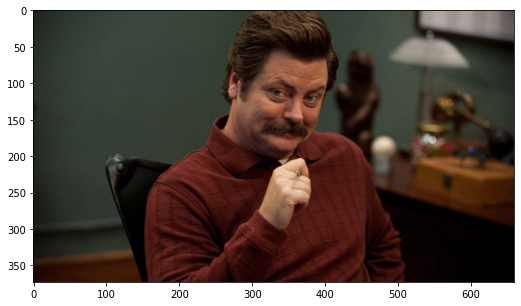

In [ ]:
# Load image library
import imageio

# Load graphing library
import matplotlib.pyplot as plt

# Obtain the face detection library
from mlxtend.image import extract_face_landmarks

# Grab an image of Ron Swanson
img = imageio.imread('https://www.gannett-cdn.com/-mm-/582568e00c17e48a137dbf529626145d89c4861c/c=0-151-3000-1846/local/-/media/2016/08/03/INGroup/Indianapolis/636058464185558674-parksandrec13.JPG?width=660&height=373&fit=crop&format=pjpg&auto=webp')

# Graph the image
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)
fig.show()

## Classify Boundaries

Once the image has been loaded, then the algorithm can be used to detect the facial structure.

In [ ]:
# Classify face boundaries
landmarks = extract_face_landmarks(img)

# Overview of procedure
print(f"Dimensions: {landmarks.shape}\n")
print(f"First 10 landmarks: \n{landmarks[:10]}\n")


Dimensions: (68, 2)

First 10 landmarks: 
[[287  97]
 [283 115]
 [280 134]
 [280 152]
 [287 168]
 [297 182]
 [310 193]
 [325 201]
 [340 204]
 [352 201]]



## Visualizing Outcomes

After computing the boundaries, let's aim to look at how well they match up with the original source image.

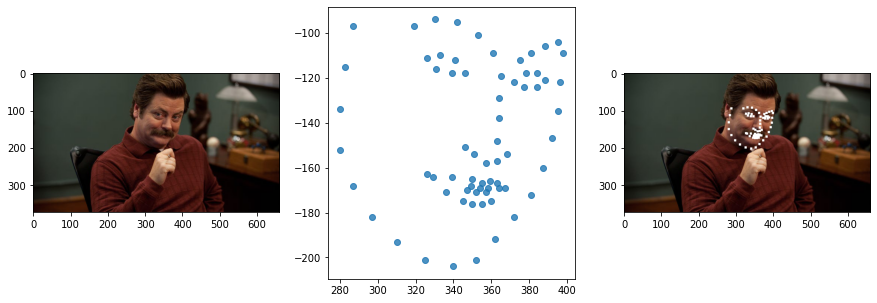

In [ ]:
# Graph input image, detected bounds, and combined panel
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 3)

# Copy original image to avoid propagating marker pixel change
img2 = img.copy()

# Insert landmarks into copied image
for p in landmarks:
    img2[p[1]-3:p[1]+3, p[0]-3:p[0]+3, :] = (255, 255, 255)
    # note that the values -3 and +3 will make the landmarks
    # overlayed on the image 6 pixels wide; depending on the
    # resolution of the face image, you may want to change
    # this value

# Add the boundary image
ax.imshow(img2)

# Display the combined plot
plt.show()
